In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar el archivo Happiness_report.csv
happiness = pd.read_csv('/content/Happiness_report.csv')

# Cargar el archivo Metadata.csv
metadata = pd.read_csv('/content/Metadata.csv')

In [22]:
# Mostrar las primeras filas del dataframe happiness
print(happiness.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

In [23]:
# Mostrar las primeras filas del dataframe metadata
print(metadata.head())

  Country Code                     Region          IncomeGroup SpecialNotes  \
0          ABW  Latin America & Caribbean          High income          NaN   
1          AFG                 South Asia           Low income          NaN   
2          AGO         Sub-Saharan Africa  Lower middle income          NaN   
3          ALB      Europe & Central Asia  Upper middle income          NaN   
4          AND      Europe & Central Asia          High income          NaN   

     TableName  
0        Aruba  
1  Afghanistan  
2       Angola  
3      Albania  
4      Andorra  


In [24]:
print(metadata.columns.tolist())

['Country Code', 'Region', 'IncomeGroup', 'SpecialNotes', 'TableName']


In [5]:
# Filtrar el DataFrame para obtener solo la información de México
mexico = happiness[happiness['Country or region'] == 'Mexico']

# Configurar la columna 'Country or region' como índice
mexico.set_index('Country or region', inplace=True)

# Mostrar el DataFrame resultante
print(mexico)

                   Overall rank  Score  GDP per capita  Social support  \
Country or region                                                        
Mexico                       23  6.595            1.07           1.323   

                   Healthy life expectancy  Freedom to make life choices  \
Country or region                                                          
Mexico                               0.861                         0.433   

                   Generosity  Perceptions of corruption  
Country or region                                         
Mexico                  0.074                      0.073  


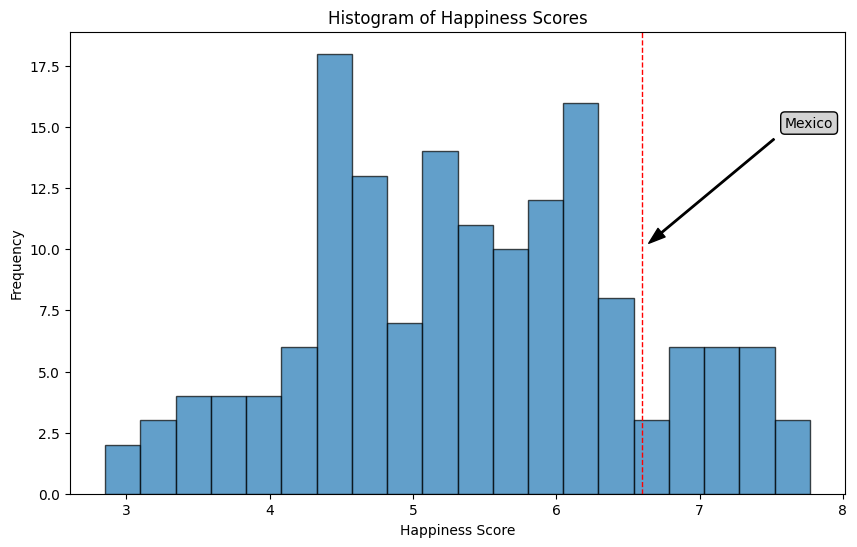

In [7]:
# Obtener el puntaje de México
mexico_score = mexico['Score'].values[0]

# Crear el histograma del puntaje
plt.figure(figsize=(10, 6))
plt.hist(happiness['Score'], bins=20, edgecolor='black', alpha=0.7)

# Añadir una línea vertical para el puntaje de México
plt.axvline(mexico_score, color='r', linestyle='dashed', linewidth=1)

# Añadir una etiqueta de texto en forma de burbuja
plt.annotate(
    'Mexico',
    xy=(mexico_score, 10),  # Coordenadas donde se muestra la burbuja
    xytext=(mexico_score + 1, 15),  # Coordenadas de la etiqueta de texto
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgrey')
)

# Añadir título y etiquetas
plt.title('Histogram of Happiness Scores')
plt.xlabel('Happiness Score')
plt.ylabel('Frequency')

# Mostrar el gráfico
plt.show()

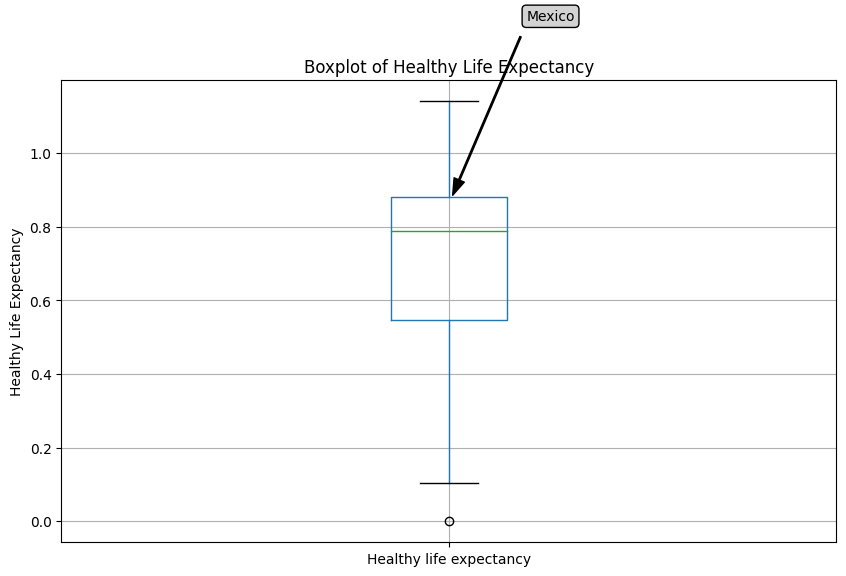

In [8]:
# Obtener el valor de la esperanza de vida de México
mexico_life_expectancy = mexico['Healthy life expectancy'].values[0]

# Crear el boxplot para la columna 'Healthy life expectancy'
plt.figure(figsize=(10, 6))
boxplot = happiness.boxplot(column='Healthy life expectancy')

# Añadir una anotación para el valor de México
plt.annotate(
    'Mexico',
    xy=(1, mexico_life_expectancy),  # Coordenadas donde se muestra la burbuja
    xytext=(1.1, mexico_life_expectancy + 0.5),  # Coordenadas de la etiqueta de texto
    arrowprops=dict(facecolor='black', shrink=0.05, width=1, headwidth=8),
    bbox=dict(boxstyle="round,pad=0.3", edgecolor='black', facecolor='lightgrey')
)

# Añadir título y etiquetas
plt.title('Boxplot of Healthy Life Expectancy')
plt.ylabel('Healthy Life Expectancy')

# Mostrar el gráfico
plt.show()

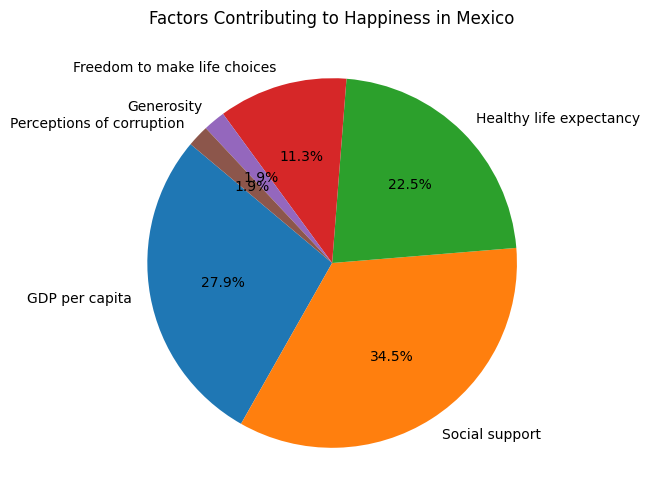

In [10]:
# Seleccionar los factores que contribuyen a la evaluación de la felicidad
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Extraer los valores para México
values = mexico[factors].values.flatten()

# Crear la gráfica circular
plt.figure(figsize=(10, 6))
plt.pie(values, labels=factors, autopct='%1.1f%%', startangle=140)

# Añadir título
plt.title('Factors Contributing to Happiness in Mexico')

# Mostrar el gráfico
plt.show()

In [14]:
# Filtrar el país más feliz y el menos feliz
most_happy = happiness.loc[happiness['Score'].idxmax(), 'Country or region']
least_happy = happiness.loc[happiness['Score'].idxmin(), 'Country or region']
mexico = 'Mexico'
other_countries = ['Canada', 'Australia']  # Puedes cambiar estos países por otros de tu interés

# Crear una lista con los países de interés
countries_of_interest = [most_happy, least_happy, mexico] + other_countries

# Filtrar el DataFrame para incluir solo los países de interés
filtered_df = happiness[happiness['Country or region'].isin(countries_of_interest)]

# Mostrar el DataFrame filtrado
filtered_df

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
10,11,Australia,7.228,1.372,1.548,1.036,0.557,0.332,0.290
22,23,Mexico,6.595,1.070,1.323,0.861,0.433,0.074,0.073
155,156,South Sudan,2.853,0.306,0.575,0.295,0.010,0.202,0.091


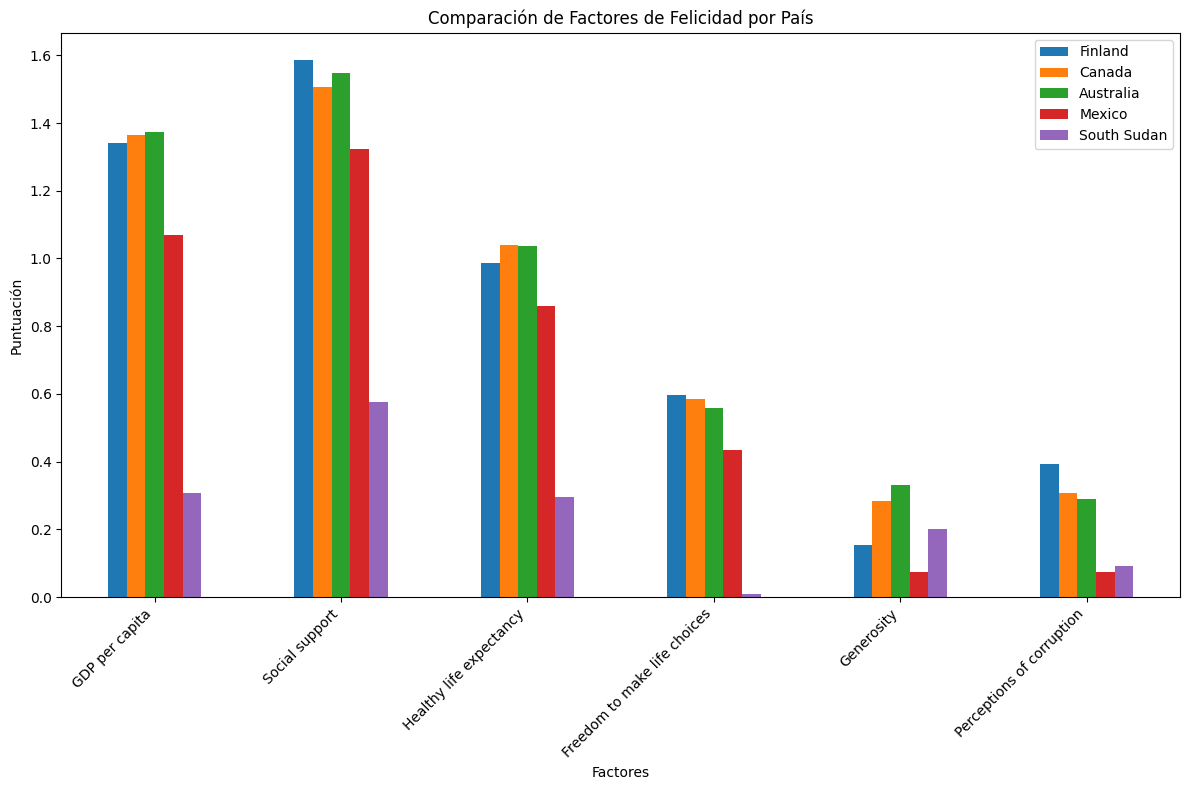

In [15]:
# Definir los factores y los países de interés
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']
countries = ['Country or region']

# Filtrar el DataFrame para incluir solo las columnas de interés
filtered_data = filtered_df.loc[:, countries + factors]

# Preparar los datos para el gráfico
countries_data = filtered_data.set_index('Country or region')
countries_data = countries_data.transpose()  # Transponer para tener los factores como índice

# Configurar colores para cada país
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b']

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))
countries_data.plot(kind='bar', color=colors, ax=plt.gca())

# Personalizar el gráfico
plt.title('Comparación de Factores de Felicidad por País')
plt.xlabel('Factores')
plt.ylabel('Puntuación')
plt.xticks(rotation=45, ha='right')
plt.legend(loc='upper right')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


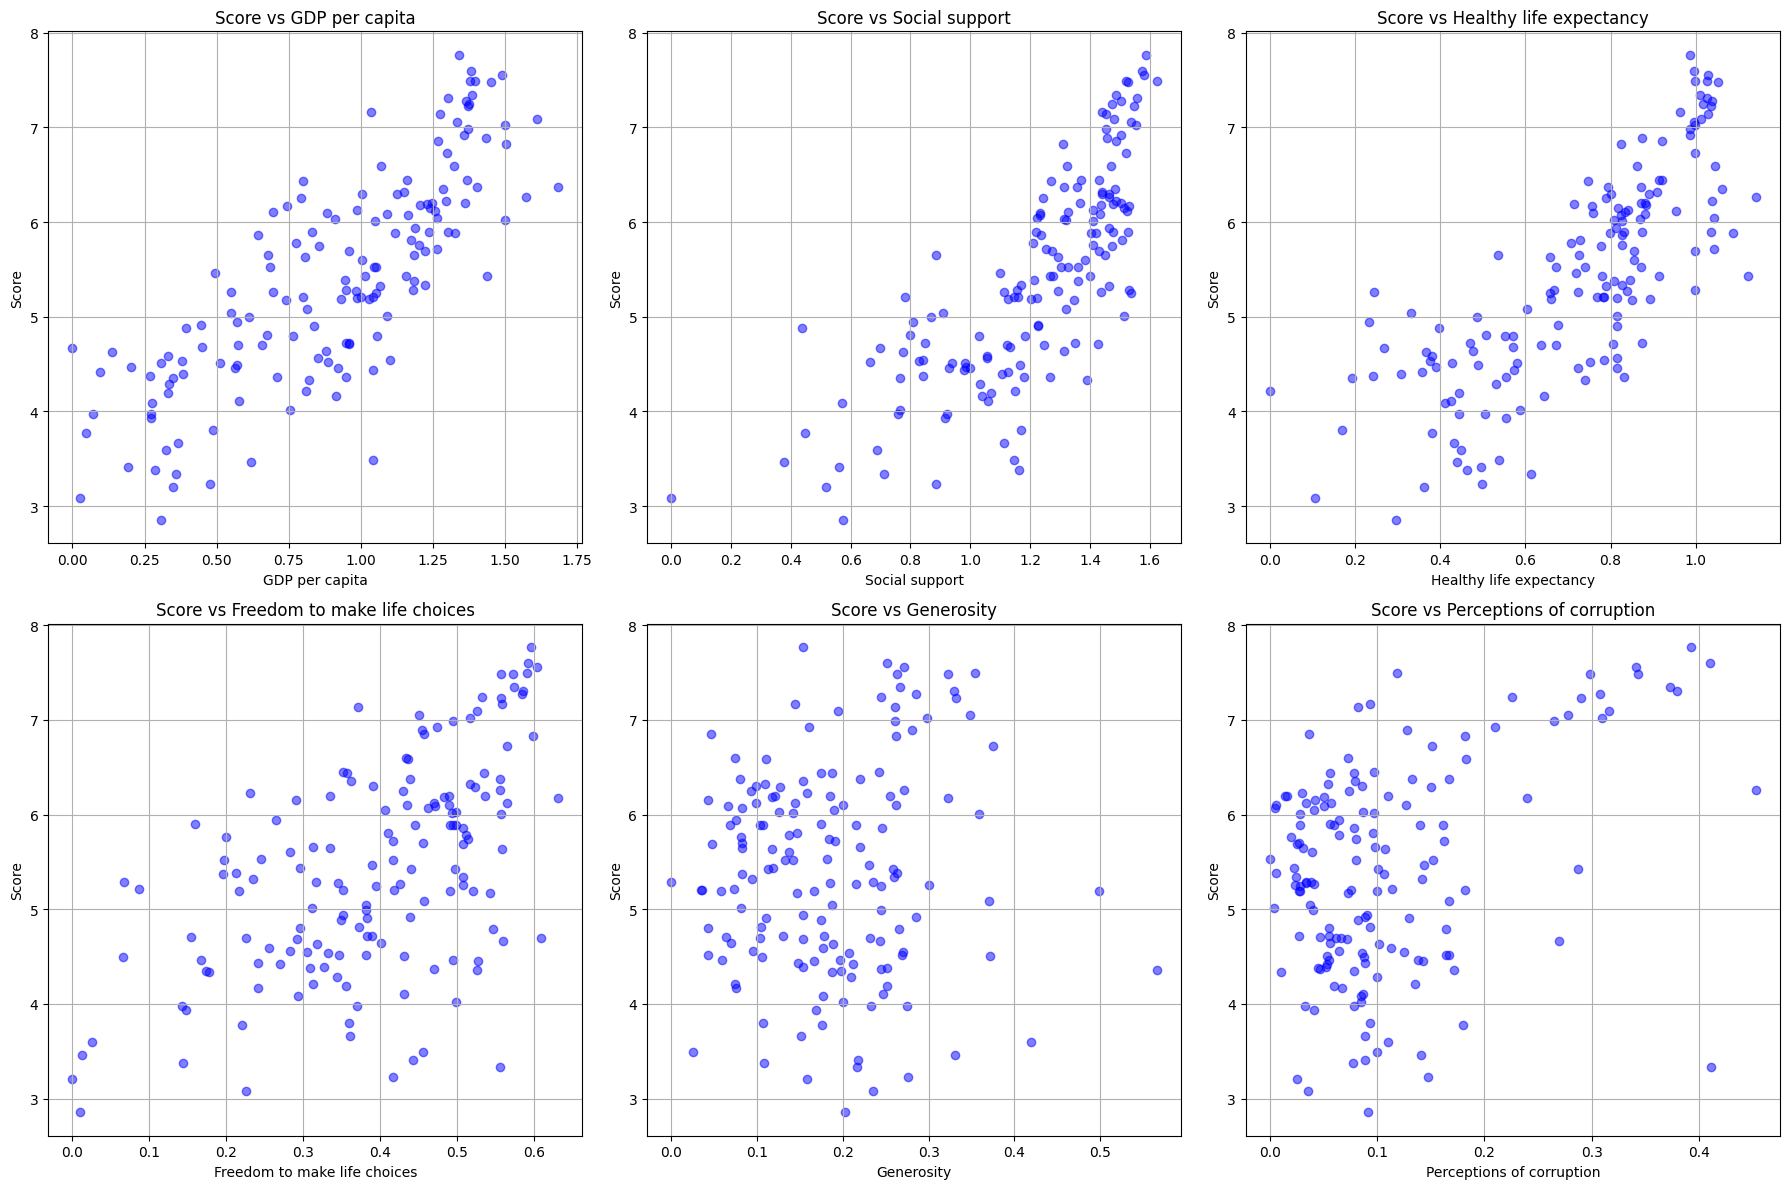

In [17]:
import matplotlib.pyplot as plt

# Definir los factores de interés
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption']

# Crear la matriz de subgráficas 2x3
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 12))

# Iterar sobre los factores y crear scatter plots en cada subgráfico
for i, factor in enumerate(factors):
    row = i // 3  # Fila en la que se encuentra el subgráfico
    col = i % 3   # Columna en la que se encuentra el subgráfico

    # Crear scatter plot para el factor actual
    axes[row, col].scatter(happiness[factor], happiness['Score'], color='blue', alpha=0.5)

    # Añadir detalles al subgráfico
    axes[row, col].set_title(f'Score vs {factor}')
    axes[row, col].set_xlabel(factor)
    axes[row, col].set_ylabel('Score')
    axes[row, col].grid(True)

# Ajustar el diseño y mostrar los gráficos
plt.tight_layout()
plt.show()


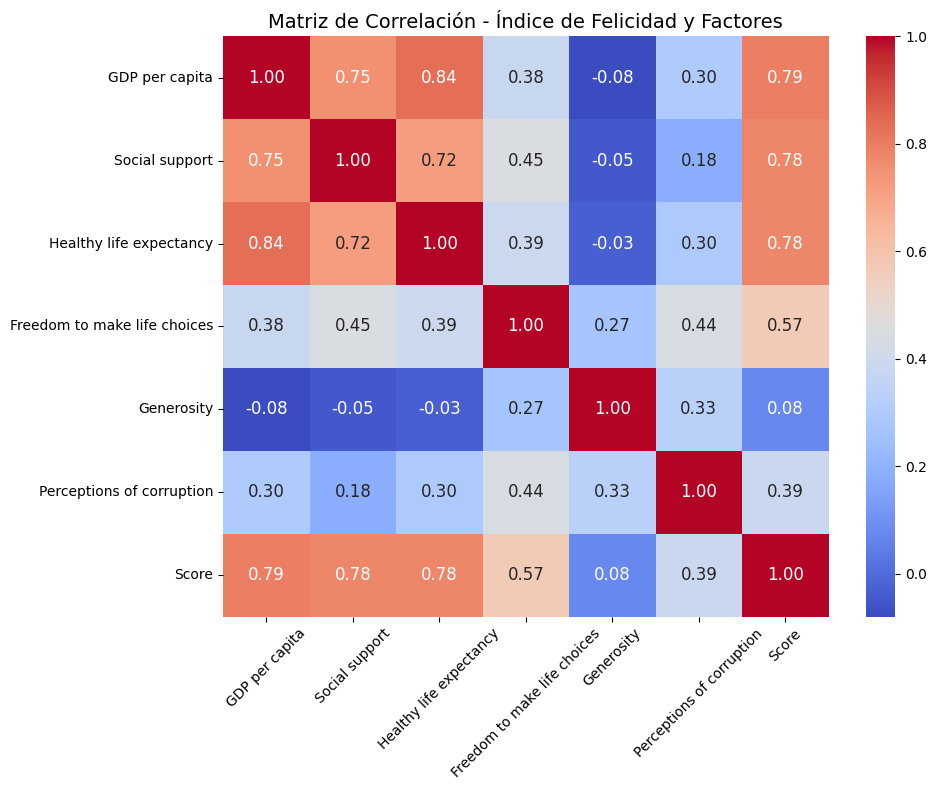

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Definir los factores de interés
factors = ['GDP per capita', 'Social support', 'Healthy life expectancy',
           'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'Score']

# Filtrar el DataFrame para incluir solo los factores de interés
filtered_happiness = happiness[factors]

# Calcular la matriz de correlación
corr_matrix = filtered_happiness.corr()

# Crear el heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', annot_kws={"size": 12})

# Personalizar el heatmap
plt.title('Matriz de Correlación - Índice de Felicidad y Factores', fontsize=14)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()

# Mostrar el heatmap
plt.show()


In [29]:
print(happiness.head())
print(metadata.head())

   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.410  
2                

Happiness DataFrame:
   Overall rank Country or region  Score  GDP per capita  Social support  \
0             1           Finland  7.769           1.340           1.587   
1             2           Denmark  7.600           1.383           1.573   
2             3            Norway  7.554           1.488           1.582   
3             4           Iceland  7.494           1.380           1.624   
4             5       Netherlands  7.488           1.396           1.522   

   Healthy life expectancy  Freedom to make life choices  Generosity  \
0                    0.986                         0.596       0.153   
1                    0.996                         0.592       0.252   
2                    1.028                         0.603       0.271   
3                    1.026                         0.591       0.354   
4                    0.999                         0.557       0.322   

   Perceptions of corruption  
0                      0.393  
1                      0.41

<ipython-input-36-2f74996e3f6e>:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Score', data=region_avg_happiness, palette='viridis')


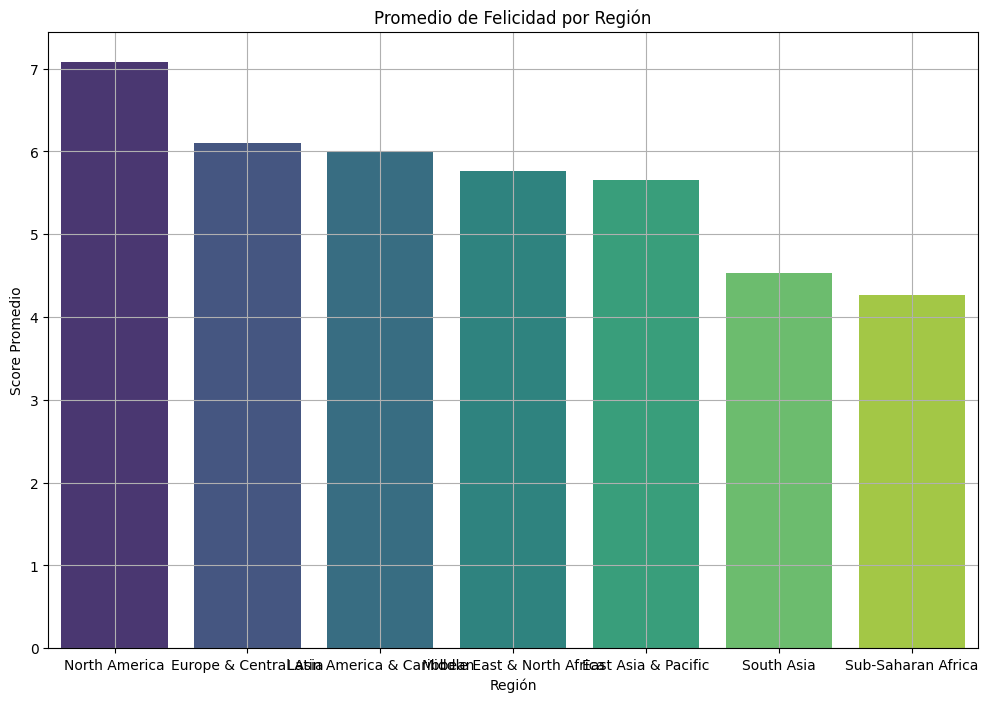

In [36]:
# Verificar los primeros datos de happiness y metadata
print("Happiness DataFrame:")
print(happiness.head())
print("\nMetadata DataFrame:")
print(metadata.head())

# Unir ambos DataFrames por el nombre del país en TableName
merged_df = pd.merge(happiness, metadata, left_on='Country or region', right_on='TableName', how='left')

# Calcular el promedio de Score por región
region_avg_happiness = merged_df.groupby('Region')['Score'].mean().reset_index()

# Ordenar los datos por promedio de Score descendente para mejor visualización
region_avg_happiness = region_avg_happiness.sort_values(by='Score', ascending=False)

# Crear el gráfico de barras con barras verticales
plt.figure(figsize=(12, 8))
sns.barplot(x='Region', y='Score', data=region_avg_happiness, palette='viridis')

# Personalizar el gráfico
plt.title('Promedio de Felicidad por Región')
plt.xlabel('Región')
plt.ylabel('Score Promedio')
plt.grid(True)

# Mostrar el gráfico
plt.show()